### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats # 회귀분석에 필요한 라이브러리
from sklearn.datasets import load_boston
%matplotlib inline
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
1%4

1

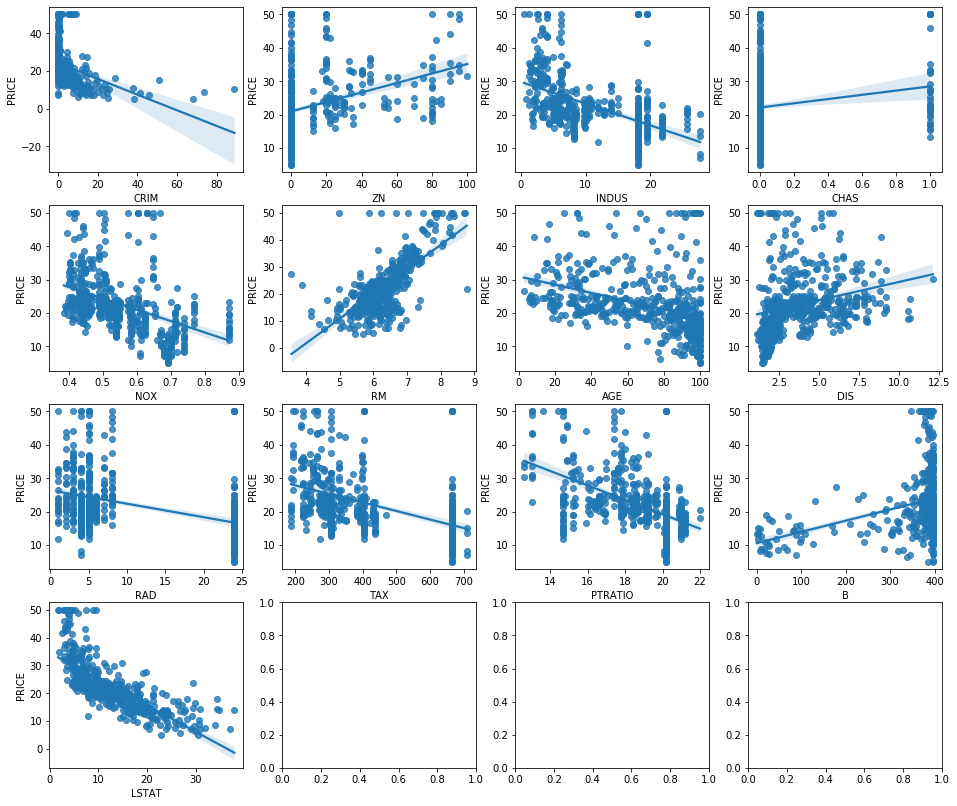

In [3]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,14) , ncols=4 , nrows=4)
lm_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [5]:
print('절편 값 (W0):',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1)) # .COEF_: 추정된 기울기 확인, 상수제외
print('각 계수 :', X_train.columns)

절편 값 (W0): 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
각 계수 : Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [6]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [7]:
# 계수의 절대값 비교
coeff = pd.Series(data=np.round(np.abs(lr.coef_), 1), index=X_data.columns )
coeff.sort_values(ascending=False)

NOX        19.8
RM          3.4
CHAS        3.0
DIS         1.7
PTRATIO     0.9
LSTAT       0.6
RAD         0.4
ZN          0.1
CRIM        0.1
B           0.0
TAX         0.0
AGE         0.0
INDUS       0.0
dtype: float64

In [8]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


#### 보스턴 주택 가격 Polynomial Regression 진행

In [9]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

degrees = [1,2,3,4,5,6,7]

# 다항 회귀의 차수(degree)를 1~7까지로 각각 변화시키면서 비교합니다.

for i in range(len(degrees)):
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_data, y_target)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X_data, y_target,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))


Degree 1 회귀 계수는 [ -0.   0.   0.   3. -18.   4.   0.  -1.   0.  -0.  -1.   0.  -1.] 입니다.
Degree 1 MSE 는 34.71 입니다.

Degree 2 회귀 계수는 [ -5.   0.  -5.  30. 134.  22.   1.  -7.   2.   0.   6.   0.   1.   0.
   0.   0.   2.  -1.   0.  -0.  -0.   0.  -0.   0.  -0.   0.  -0.  -0.
  -0.  -1.   0.   0.  -0.  -0.   0.  -0.   0.  -0.   0.   0.   1.   0.
   0.   0.  -0.   0.  -0.   0.  -0.  30. -34.  -6.   0.   1.  -0.   0.
  -1.   0.  -0. -36.   2.  -0.  14.  -2.   0. -11.  -0.   1.   0.  -0.
   0.  -0.  -0.  -1.  -0.  -0.   0.  -0.   0.  -0.   0.  -0.  -0.   0.
  -0.  -0.  -0.  -0.   0.  -0.   0.  -0.   0.  -0.  -0.   0.  -0.  -0.
   0.   0.   0.  -0.  -0.   0.] 입니다.
Degree 2 MSE 는 94.05 입니다.

Degree 3 회귀 계수는 [-1.43490e+04 -1.61720e+04 -6.77690e+04  6.85000e+03  2.29040e+04
 -9.22900e+03  1.39000e+02  5.15900e+03 -4.94526e+05  1.24300e+04
 -1.36759e+05 -4.90000e+02 -1.44300e+03  8.34000e+02  1.10500e+03
 -5.32000e+02  3.30000e+01  2.96930e+04  6.10000e+01  6.00000e+00
  5.68000e+02 -4.61000e+03 


Degree 5 회귀 계수는 [-0.  0.  0. ...  0. -0.  0.] 입니다.
Degree 5 MSE 는 6363006.41 입니다.

Degree 6 회귀 계수는 [-0.  0. -0. ... -0.  0.  0.] 입니다.
Degree 6 MSE 는 8281744.67 입니다.

Degree 7 회귀 계수는 [ 0.  0. -0. ... -0. -0.  0.] 입니다.
Degree 7 MSE 는 98657431.81 입니다.


### _____________

### 실습 1: 와인 퀄리티 예측을 1~5차 다항식으로 예측 진행 후 MSE 비교 (1hour)

### ___________

## Regularized Linear Models – Ridge, Lasso
### Regularized Linear Model - Ridge Regression

In [10]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [11]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


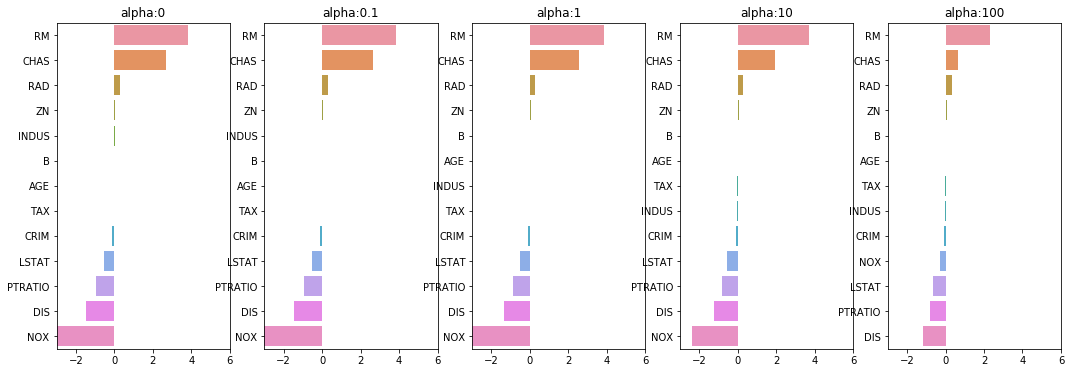

In [14]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



In [15]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


##### ____________________________________________________

### 실습 2: 알파를 200에서 1000까지 100단위로 키우면서 RMSE가 더 줄어드는 알파값이 있는지, 알파값을 계속해서 올렸더니 어떤 현상이 나타나는 지 찾습니다. (15 minutes)

##### ___________________________________________________

### 실습 3: 알파를 변경하면서 다항회귀를 degree를 변경하면서 RMSE를 최소로 할 수 있는 최적의 degree와 알파를 찾아봅니다. (20 minutes) 

### __________________

### 실습 4: 와인퀄리티 실습에서 릿지회귀를 적용하고, 최적의 알파와 degree를 찾아 RMSE를 낮춥니다. (30 minutes)

### 그 외 필요한 수정 부분은 수정을 하고 개인적으로 RMSE를 업데이트할 방법을 찾습니다.

### _______________________________

### 라쏘 회귀

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha = 10)
neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-27.786 -46.397 -80.323 -61.56  -16.302]
 5 folds 의 개별 RMSE scores :  [5.271 6.812 8.962 7.846 4.038]
 5 folds 의 평균 RMSE : 6.586 


In [25]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0.03, 0.07, 0.1, 0.5, 1, 3]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('Lasso alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

Lasso alpha 0.03 일 때 5 folds 의 평균 RMSE : 5.644 
Lasso alpha 0.07 일 때 5 folds 의 평균 RMSE : 5.612 
Lasso alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.615 
Lasso alpha 0.5 일 때 5 folds 의 평균 RMSE : 5.669 
Lasso alpha 1 일 때 5 folds 의 평균 RMSE : 5.776 
Lasso alpha 3 일 때 5 folds 의 평균 RMSE : 6.189 


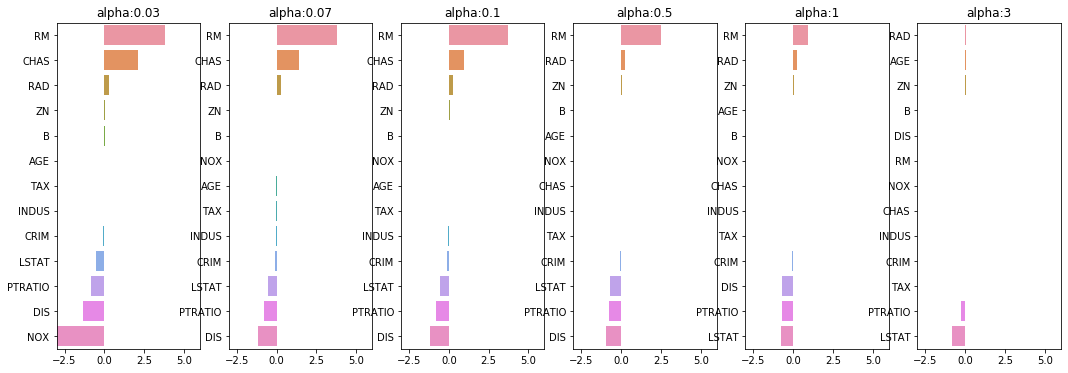

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [26]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=6)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_lasso_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=lasso.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_lasso_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

### __

### 실습 5: 알파를 넓은 단위로 변경하면서 RMSE가 더 줄어드는 알파값이 있는지, 찾고 최종 알파값과 RMSE를 카톡에 공유합니다. (15 minutes)

### ___

### 실습 6: 라쏘의 알파와 다항회귀의 degree를 변경하면서 RMSE를 최소로 할 수 있는 최적의 degree와 알파를 찾아봅니다. (20 minutes)

### __

### 실습 7: 와인퀄리티 실습에서 랏소회귀를 적용하고, 최적의 알파와 다항회귀 degree를 찾아 RMSE를 낮춥니다. (30 minutes)

### ___

### 엘라스틱넷 회귀

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

EN = ElasticNet(alpha = 1, l1_ratio=0.7) # l1_ratio = a/(a+b)
neg_mse_scores = cross_val_score(EN, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alphas in elastic_alphas:
    EN = ElasticNet(alpha = alphas, l1_ratio = 0.7)
        
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(EN, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('ElasticNet alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alphas,avg_rmse))

### ______________________

### 실습 8: Elastic Net 알파와 L1 비율을 모두 사용하여 최적의 알파와 L1 비율을 찾고 카톡에 공유합니다. (15 minutes)

### ___________________

### 실습 9: 다항 회귀와 Elastic Net을 결합하여 최적의 degree와 알파, L1 비율을 모두 찾고 결과와 최저 RMSE 를 카톡에 공유합니다. (30 minutes)

### ________________________

### 실습 10: 와인 퀄리티에서 다항 회귀와 Elastic Net을 결합하여 최적의 degree와 알파, L1 비율을 모두 찾고 결과와 최저 RMSE 를 카톡에 공유합니다. (30 minutes)

### _________________

### 실습 11: Linear regression, 다항회귀, Ridge, Lasso, Elastic Net의 최저 RMSE와 그 때의 파라미터 값들을 정리하고, 각각의 제약들이 실제 데이터에 어떤 차이를 주고 있는 지 정리하여 제출합니다. (30 minutes)

### ___

### 실습 12: 보스톤 모든 피처들을 피처 스케일링을 통해 정규화, 표준화, 로그변환 작업 후 Linear Regression, 다항회귀, Ridge, Lasso, Elastic Net의 최저 RMSE를 찾고 11번 결과와 비교하여 성능이 향상되는 지 확인 후 결과를 제출합니다. (30 minutes)

### 로그변환은 해당 피처에 np.log1p(feature)를 사용하면 변환 됩니다. 교재 326p 참조

### _________

### 실습 13: 12번 실습 문제의 내용을 와인 퀄리티 분석에 적용합니다. (30 Minutes)

### _________________